variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


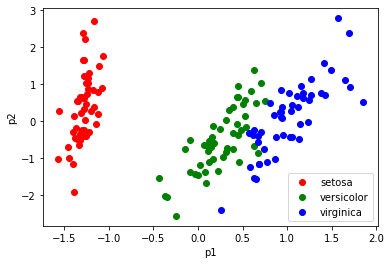

In [4]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns = feature_names)
df["species"] = y

x = data

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)

print("sum: ",sum(pca.explained_variance_ratio_))

# 2D

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.species == each],df.p2[df.species == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()


In [0]:
# image reconstruction 
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.columns

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)

In [8]:
mnist = mnist.drop('6',axis=1)
mnist.shape

(19999, 784)

In [0]:
scaler = StandardScaler()

mnist = scaler.fit_transform(mnist)

In [0]:
pca = PCA(.95)

In [11]:
lower_dimensional_data = pca.fit_transform(mnist)
pca.n_components_

307

In [0]:
approximation = pca.inverse_transform(lower_dimensional_data)

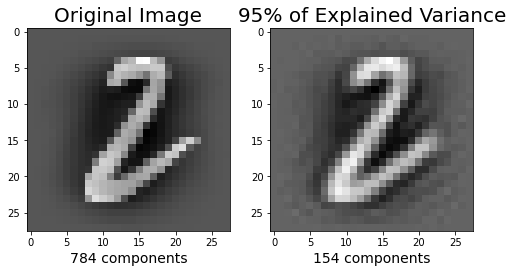

In [14]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist[50].reshape(28,28),cmap = plt.cm.gray,interpolation='nearest')
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[50].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [15]:
# Explained Variance and number of principal components
pca = PCA()
pca.fit(mnist)
pca.n_components_


784

In [16]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

693.0346534653476

In [17]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[5.902050236176141, 4.282780899969136, 3.8856311018949743, 2.998139274294747, 2.5759065343372547]


In [0]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

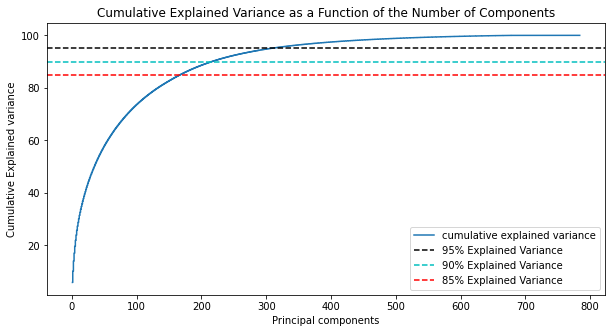

In [19]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [20]:
# Singular value decomposition
import scipy as sp
import numpy as np
from scipy import linalg as LA
A = np.array([[4.0,3.0], [2.0,2.0], [-1.0,-3.0], [-5.0,-2.0]])
U, s, Vt = LA.svd(A, full_matrices=False)
print(U)
#[[-0.61215255 -0.05228813]
# [-0.34162337 -0.2025832 ]
# [ 0.31300005 0.80704816]
# [ 0.64077586 -0.55217683]]
print(s)
#[ 8.16552039 2.30743942]
print(Vt)
#[[-0.81424526 -0.58052102]
# [ 0.58052102 -0.81424526]]
x = np.array([0.243,0.97])
x = x/LA.norm(x)
xi = Vt.dot(x)
print(xi)
#[-0.7609864 -0.64876784]
print(LA.norm(xi))
#1.0
S = LA.diagsvd(s,2,2)
eta = S.dot(xi)
print(eta)
#[-6.21384993 -1.49699248]
print(LA.norm(eta))
#6.391628704703714
S = LA.diagsvd(s,2,2)
eta = S.dot(xi)
print (eta)
y = U.dot(eta)
print(y)
#[ 3.88209899 2.42606187 -3.1530804 -3.15508046]
print(A.dot(x))
#[ 3.88209899 2.42606187 -3.1530804 -3.15508046]

[[-0.61215255 -0.05228813]
 [-0.34162337 -0.2025832 ]
 [ 0.31300005  0.80704816]
 [ 0.64077586 -0.55217683]]
[8.16552039 2.30743942]
[[-0.81424526 -0.58052102]
 [ 0.58052102 -0.81424526]]
[-0.7609864  -0.64876784]
1.0
[-6.21384993 -1.49699248]
6.391628704703714
[-6.21384993 -1.49699248]
[ 3.88209899  2.42606187 -3.1530804  -3.15508046]
[ 3.88209899  2.42606187 -3.1530804  -3.15508046]
